# **ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Ïã§Ïäµ Í≥ºÏ†ú**

Í∏∞Ïàò: 22Í∏∞
Ïù¥Î¶Ñ: ÏµúÌï¥Ïõê

Ïù¥ Í≥ºÏ†úÎäî ARIMA Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ 2014ÎÖÑ 6Ïõî 1ÏùºÎ∂ÄÌÑ∞ 2024ÎÖÑ 6Ïõî 1ÏùºÍπåÏßÄÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† ÏòàÏ∏°ÌïòÎäî Í≥ºÏ†ïÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Í∞Å Îã®Í≥ÑÏóêÏÑú ÌïÑÏöîÌïú ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ≥†, ÎπàÏπ∏ÏùÑ Ï±ÑÏõå Í≥ºÏ†úÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.

---



- DataReader([Ï¢ÖÎ™©Ï†ïÎ≥¥],[Îç∞Ïù¥ÌÑ∞ÏÜåÏä§],[ÏãúÏûëÏùº],[Ï¢ÖÎ£åÏùº])
    - High(ÏµúÍ≥†Í∞Ä)
    - Low(ÏµúÏ†ÄÍ∞Ä)
    - Open(ÏãúÍ∞Ä)
    - Close(Ï¢ÖÍ∞Ä)
    - Volume(Í±∞ÎûòÎüâ)
    - Adj Close (ÏàòÏ†ïÏ¢ÖÍ∞Ä;Î∂ÑÌï†,Î∞∞Îãπ,Î∞∞Î∂Ñ,Ïã†Ï£º Î∞úÏÉùÏù¥ Îêú Í≤ΩÏö∞Î•º Í≥†Î†§ÌïòÏó¨ Ï£ºÏãùÍ∞ÄÍ≤©ÏùÑ Ï°∞Ï†ïÌï¥Îëî Í∞ÄÍ≤©)

In [21]:
!pip install yfinance pmdarima matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## **1. Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï¥àÍ∏∞ ÌÉêÏÉâ**

### **Î™©Ìëú**
- GoogleÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Yahoo FinanceÏóêÏÑú ÏàòÏßëÌïòÏó¨ Í∏∞Î≥∏Ï†ÅÏù∏ ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞ÏôÄ ÌäπÏÑ±ÏùÑ Ïù¥Ìï¥ÌïòÍ≥†, ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùò Í∏∞Ï¥àÎ•º ÎßàÎ†®Ìï©ÎãàÎã§.
---

- **ÏãúÏûëÏùº**: `2014-06-01`
- **Ï¢ÖÎ£åÏùº**: `2024-06-01`
- **Ï¢ÖÎ™©**: `GOOG`
---

### **ÏßÄÏãúÏÇ¨Ìï≠**:
- 2014ÎÖÑ 6Ïõî 1ÏùºÎ∂ÄÌÑ∞ 2024ÎÖÑ 6Ïõî 1ÏùºÍπåÏßÄÏùò Google Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Yahoo FinanceÏóêÏÑú Î∂àÎü¨Ïò§ÏÑ∏Ïöî.
- Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌïú ÌõÑ, Îç∞Ïù¥ÌÑ∞Ïùò Ï≤´ 5ÌñâÏùÑ Ï∂úÎ†•ÌïòÏÑ∏Ïöî.
- Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Ï¥à ÌÜµÍ≥Ñ ÏöîÏïΩ(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜåÍ∞í, ÏµúÎåÄÍ∞í Îì±)ÏùÑ Ï∂úÎ†•ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.



In [22]:
# ÏãúÏûëÏùº, Ï¢ÖÎ£åÏùº ÏÑ§Ï†ï
start = '2014-06-01'
end = '2024-06-01'

# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
data = yf.download("GOOG", start=start, end=end)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏: Ï≤´ 5Ìñâ Ï∂úÎ†•
print(data.head())

# Îç∞Ïù¥ÌÑ∞Ïùò ÌÜµÍ≥ÑÏ†Å ÏöîÏïΩ ÌôïÏù∏
print(data.describe())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-06-02  27.958241  27.968212  27.211790  27.620667  27.589272  28700582
2014-06-03  27.474070  27.541386  27.053225  27.172398  27.141512  37332215
2014-06-04  27.000870  27.355396  26.863747  27.158438  27.127567  36329469
2014-06-05  27.245197  27.671528  27.147964  27.619171  27.587778  33782496
2014-06-06  27.826603  27.826603  27.371351  27.740339  27.708807  34735104
              Open         High          Low        Close    Adj Close  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     74.181322    74.974861    73.452102    74.235356    74.150976   
std      39.945654    40.415505    39.536635    39.986349    39.940898   
min      24.664783    24.730902    24.311253    24.560070    24.532154   
25%      39.264999    39.561639    39.141300    39.316500    39.271811   
50%      59.266251    59

#### **Ï∞∏Í≥†ÏÇ¨Ìï≠**

**Yahoo FinanceÏóêÏÑú Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞Ïùò 'Adj Close'ÏôÄ 'Close'Ïùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? Ïôú 'Adj Close'Î•º Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïúÍ∞ÄÏöî?**

- 'Close'Îäî Ï£ºÏãù ÏãúÏû•Ïù¥ ÎßàÍ∞êÌï† ÎïåÏùò Ï£ºÍ∞ÄÎ•º ÏùòÎØ∏ÌïòÎ©∞, 'Adj Close'(Adjusted Close)Îäî Ï£ºÏãùÏùò Î∂ÑÌï†, Î∞∞Îãπ, Î∞∞Î∂Ñ Îì±Í≥º Í∞ôÏùÄ Ï£ºÏãù Ïù¥Î≤§Ìä∏Î•º Î∞òÏòÅÌïú ÏàòÏ†ï Ï¢ÖÍ∞ÄÏûÖÎãàÎã§.
- 'Adj Close'Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïú Ïù¥Ïú†Îäî ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº Ï£ºÏãù Í∞ÄÍ≤©Ïùò Î≥ÄÎèôÏù¥ Î∞úÏÉùÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
- ÏàòÏ†ï Ï¢ÖÍ∞ÄÎäî Ïù¥Îü¨Ìïú Ïù¥Î≤§Ìä∏Î•º Í≥†Î†§Ìïú ÌõÑÏùò Í∞ÄÍ≤©ÏùÑ Î∞òÏòÅÌïòÎØÄÎ°ú, Ïû•Í∏∞Ï†ÅÏù∏ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóêÏÑúÎäî 'Adj Close'Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ï†ïÌôïÌïú Î∂ÑÏÑùÏùÑ Í∞ÄÎä•ÌïòÍ≤å Ìï©ÎãàÎã§.

##  **2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî**

- Î™©Ìëú: Î™©Ìëú: Îç∞Ïù¥ÌÑ∞Ïùò ÌíàÏßàÏùÑ Ìñ•ÏÉÅÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Î∂àÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÍ≥†, ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Î≥∏Ï†ÅÏù∏ ÌäπÏÑ±(Ï∂îÏÑ∏ Î∞è Î≥ÄÎèôÏÑ±)ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌÉêÏÉâÌï©ÎãàÎã§.

**ÏßÄÏãúÏÇ¨Ìï≠** :
- Í±∞ÎûòÎüâ(Volume)Ïù¥ 0Ïù∏ ÏùºÏûêÎäî Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÏó¨ ÌíàÏßàÏùÑ Ìñ•ÏÉÅÏãúÌÇ§ÏÑ∏Ïöî.
- ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close) Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ 50Ïùº Ïù¥ÎèôÌèâÍ∑†(Rolling Mean)Í≥º Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®(Rolling Standard Deviation)Î•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.
- ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Ìï®Íªò Ïù¥ÎèôÌèâÍ∑†Í≥º Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º ÏãúÍ∞ÅÌôîÌïòÍ≥†, ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï∂îÏÑ∏ÏôÄ Î≥ÄÎèôÏÑ±Ïóê ÎåÄÌï¥ ÎÖºÏùòÌïòÏÑ∏Ïöî.


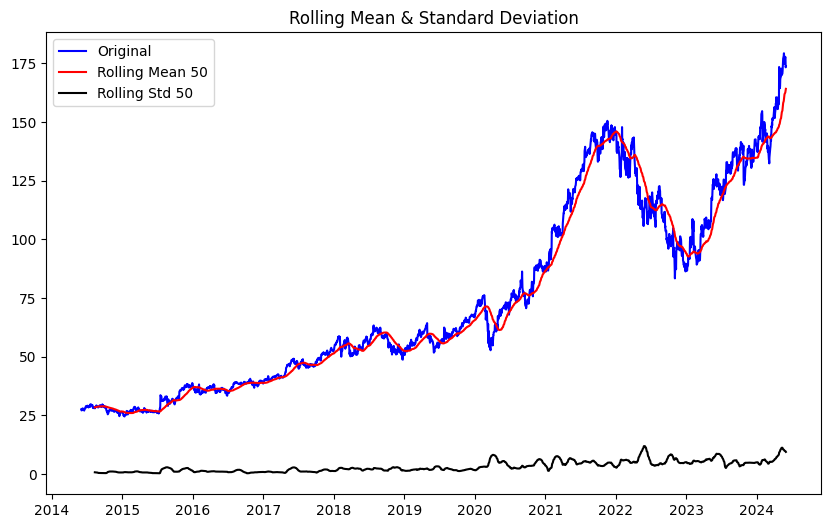

In [23]:
# Í±∞ÎûòÎüâÏù¥ 0Ïù∏ ÏùºÏûê Ï†úÍ±∞ Î∞è ÏàòÏ†ïÏ¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
data = data['Adj Close'][data['Volume'] != 0]

# Ïù¥ÎèôÌèâÍ∑† Î∞è Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    plt.figure(figsize=(10, 6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    plt.plot(rolstd, color='black', label='Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 50ÏùºÏπò Ïù¥ÎèôÌèâÍ∑† Î∞è Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
plot_rolling(data, interval= 50)


## **3. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± ÌôïÏù∏ - ADF ÌÖåÏä§Ìä∏**

### **Î™©Ìëú**
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï©ÎãàÎã§. Ï†ïÏÉÅÏÑ±ÏùÄ ÏòàÏ∏° Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú ÌïÑÏàò Ï°∞Í±¥ÏúºÎ°ú, Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏ†àÌûà Î≥ÄÌôòÌïòÏó¨ ÏòàÏ∏° Î™®Îç∏Ïù¥ Îçî Ïûò ÏûëÎèôÌï† Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§.

### **ÏßÄÏãúÏÇ¨Ìï≠**:

- ADF(Augmented Dickey-Fuller) ÌÖåÏä§Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.
- 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥†, 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ADF ÌÖåÏä§Ìä∏Î•º ÏàòÌñâÌïòÏó¨ Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.
- ADF ÌÖåÏä§Ìä∏Ïùò p-value Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú, ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÎÖºÏùòÌïòÏÑ∏Ïöî.


In [24]:
# ADF ÌÖåÏä§Ìä∏ Ìï®Ïàò Ï†ïÏùò
def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]

# ADF ÌÖåÏä§Ìä∏ ÏàòÌñâ - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
print("ADF Test - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞")
p_value_original = adf_test(data)  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.

# 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Î∞è ADF ÌÖåÏä§Ìä∏ ÏàòÌñâ
dff1 = data.diff().dropna()
print("\nADF Test - 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞")
p_value_diff1 = adf_test(dff1)  # 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.

ADF Test - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
ADF Statistics: 0.797009
p-value: 0.991588

ADF Test - 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞
ADF Statistics: -14.146945
p-value: 0.000000


## **4. ARIMA Î™®Îç∏ Î™®Ïàò(p, d, q) Ï∂îÏ†ï**
### **Î™©Ìëú**
- ACF(Autocorrelation Function)ÏôÄ PACF(Partial Autocorrelation Function) ÌîåÎ°ØÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ARIMA Î™®Îç∏Ïùò Ï†ÅÏ†àÌïú Î™®Ïàò(p, d, q)Î•º Ï∂îÏ†ïÌï©ÎãàÎã§. ÎòêÌïú, Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®ÏàòÎ•º ÏûêÎèôÏúºÎ°ú Ï∂îÏ†ïÌïòÍ≥†, Îëê Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï©ÎãàÎã§.


### **ÏßÄÏãúÏÇ¨Ìï≠**

- ACFÏôÄ PACF ÌîåÎ°ØÏùÑ Í∑∏Î†§ pÏôÄ q Í∞íÏùÑ Ï∂îÏ†ïÌïòÏÑ∏Ïöî.
Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò p, d, q Í∞íÏùÑ ÏûêÎèôÏúºÎ°ú Ï∂îÏ†ïÌïòÏÑ∏Ïöî.

- ACFÏôÄ PACF ÌîåÎ°ØÏùÑ ÌÜµÌï¥ pÏôÄ q Í∞íÏùÑ Ï∂îÏ†ïÌïòÎäî Î∞©Î≤ïÍ≥º Auto-ARIMAÏùò Í≤∞Í≥ºÍ∞Ä ÏùºÏπòÌïòÎäîÏßÄ ÎÖºÏùòÌïòÏÑ∏Ïöî.




In [25]:
!pip install pmdarima

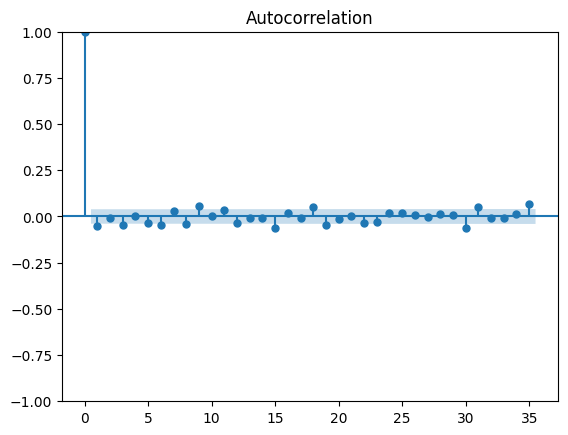

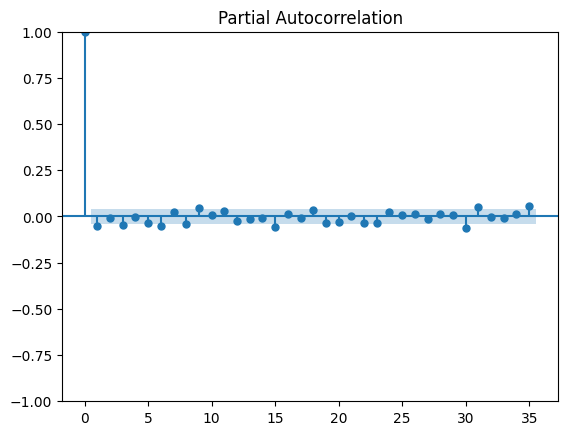

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4693.007
Date:                Mon, 09 Sep 2024   AIC                           9394.014
Time:                        09:41:14   BIC                           9417.337
Sample:                             0   HQIC                          9402.479
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0134      0.007      1.848      0.065      -0.001       0.028
ar.L1          0.7702      0.068     11.347      0.000       0.637       0.903
ma.L1         -0.8157      0.062    -13.221      0.0

In [26]:
# ACFÏôÄ PACF ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
plot_acf(dff1)  # 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
plot_pacf(dff1)  # 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
plt.show()

# Auto-ARIMAÎ•º ÏÇ¨Ïö©Ìïú Î™®Ïàò Ï∂îÏ†ï
model = pm.auto_arima(data, d=1, start_p=0, max_p=3, start_q=0, max_q=3, seasonal=False, stepwise=True)
print(model.summary())

### 5. ARIMA Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
**Î™©Ìëú**
- ARIMA Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ≥†, ÌõàÎ†®Îêú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.

**ÏßÄÏãúÏÇ¨Ìï≠**

- Îç∞Ïù¥ÌÑ∞Î•º 90%Ïùò ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ 10%Ïùò ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.
- ARIMA Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇ§Í≥†, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî.
- ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Ïã§Ï†ú Í∞íÍ≥º ÎπÑÍµêÌïòÏÑ∏Ïöî.

**ÏßàÎ¨∏**

- ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄ ÏñºÎßàÎÇò Ïûò ÏùºÏπòÌïòÎÇòÏöî?
- ÏòàÏ∏°Ïù¥ ÏûòÎ™ªÎêú Î∂ÄÎ∂ÑÏù¥ ÏûàÎã§Î©¥, Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏùºÍπåÏöî?



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4009.037
Date:                Mon, 09 Sep 2024   AIC                           8026.073
Time:                        10:19:43   BIC                           8048.975
Sample:                             0   HQIC                          8034.429
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0105      0.008      1.334      0.182      -0.005       0.026
ar.L1          0.7510      0.085      8.869      0.000       0.585       0.917
ma.L1         -0.7920      0.079    -10.052      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


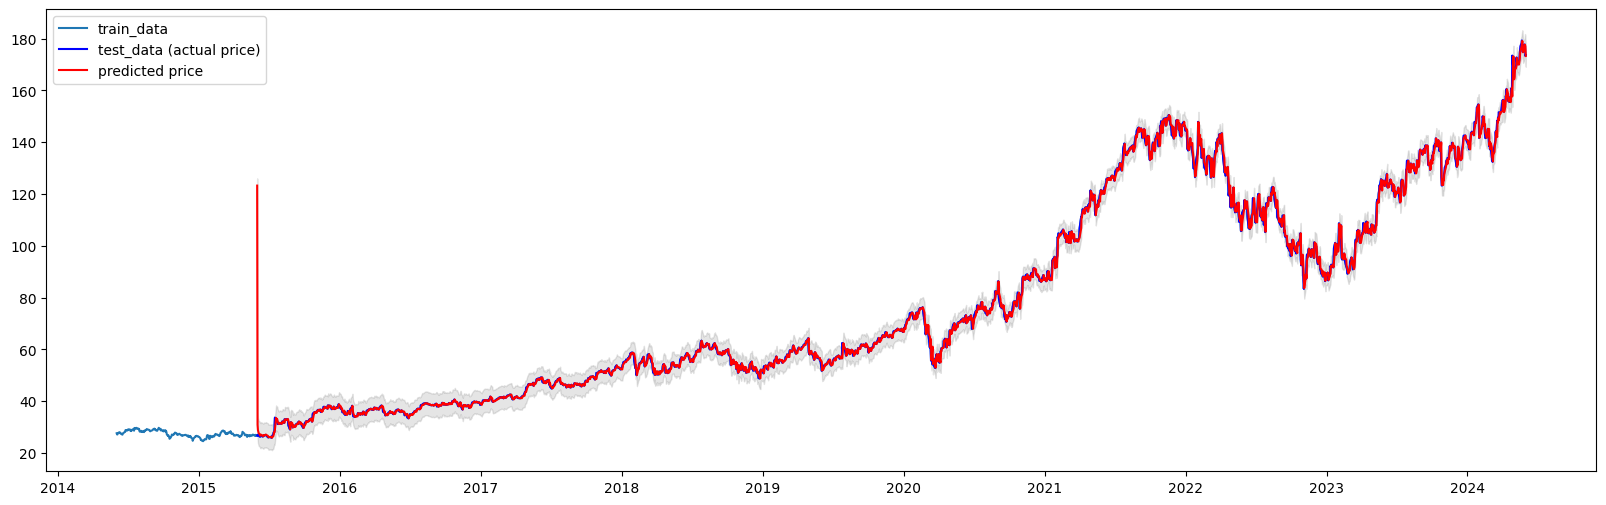

In [28]:
# Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.1):]

# ARIMA Î™®Îç∏ ÌõàÎ†®
model_fit = pm.auto_arima(train_data, d=1, start_p=0, max_p=2, start_q=0, max_q=2, seasonal=False, stepwise=True)
print(model_fit.summary())

def forecast_n_step(model, n = 1):
  fc, conf_int = model.predict(n_periods = n, return_conf_int = True)
  return (
      fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
  )

def forecast(len, model, index, data):
  y_pred = []
  pred_upper = []
  pred_lower = []

  if data is not None:
    for new_ob in data:
      fc, conf = forecast_n_step(model)
      y_pred.append(fc[0])
      pred_upper.append(conf[0][1])
      pred_lower.append(conf[0][0])
      model.update(new_ob)
  else:
    for i in range(len):
      fc, conf = forecast_n_step(model)
      y_pred.append(fc[0])
      pred_upper.append(conf[0][1])
      pred_lower.append(conf[0][0])
      model.update(fc[0])

  return pd.Series(y_pred, index = index), pred_upper, pred_lower

# ÏòàÏ∏° ÏàòÌñâ Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data=test_data)

plt.figure(figsize=(20, 6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r', label='predicted price')
plt.fill_between(test_data.index, lower, upper, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()


- ÏòàÏ∏° Í≤∞Í≥º  

  1. ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ïã§Ï†ú Í≤∞Í≥ºÏôÄ Ïú†ÏÇ¨.  
  2. 2015ÎÖÑÏóê ÌÅ∞ Î≥ÄÎèôÏù¥ ÏùºÏñ¥ÎÇ®. Ïù¥ÏÉÅÏπòÎ°ú Ïù∏Ìïú Ïò§Î•òÎ°ú Ï∂îÏ∏°.

## 6. Î™®Îç∏ ÌèâÍ∞Ä Î∞è Ìñ•ÌõÑ 1ÎÖÑ ÏòàÏ∏°
**Î™©Ìëú**
- ARIMA Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Îã§ÏñëÌïú ÏßÄÌëúÎ°ú ÌèâÍ∞ÄÌïòÍ≥†, Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÏó¨ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÎØ∏Îûò ÎèôÌñ•ÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.

**ÏßÄÏãúÏÇ¨Ìï≠**

- MSE, MAE, RMSE, MAPEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÏÑ∏Ïöî.
- Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÍ≥†, ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.


**ÏßàÎ¨∏**

- ÌèâÍ∞Ä ÏßÄÌëú Ï§ë Í∞ÄÏû• Ï§ëÏöîÌïú Í≤ÉÏùÄ Î¨¥ÏóáÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎÇòÏöî? Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?  
  : MAPEÍ∞Ä ÏòàÏ∏°Í∞íÏù¥ Ïã§Ï†úÍ∞íÏóê ÎπÑÌï¥ ÏñºÎßàÎÇò Ï†ïÌôïÌïúÏßÄ ÌÅ¨Í∏∞Í∞Ä ÏïÑÎãå ÎπÑÏú®Î°ú ÎÇòÌÉÄÎÇ¥Í∏∞ ÎïåÎ¨∏Ïóê Ïú†Ïö©ÌïòÎã§.
- Ìñ•ÌõÑ 1ÎÖÑÍ∞Ñ ÏòàÏ∏°Ìïú Ï£ºÍ∞ÄÎ•º Í∏∞Î∞òÏúºÎ°ú Ïñ¥Îñ§ Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌï† Ïàò ÏûàÎÇòÏöî?  
  : ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÉÅÏäπÌïòÎäî Î™®ÏñëÏùÑ Î≥¥ÏïÑ ÏïûÏúºÎ°úÎèÑ Í≥ÑÏÜç ÏÉÅÏäπÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÎ≥¥Ïù∏Îã§.

In [29]:
# Î™®Îç∏Ïùò Ïò§Ï∞®Ïú® Í≥ÑÏÇ∞
mse = mean_squared_error(test_data, fc)  # Ï≤´ Î≤àÏß∏ Ïù∏ÏàòÎ•º ÎπàÏπ∏ÏúºÎ°ú ÎÇ®Í≤®ÎëêÏÑ∏Ïöî.
mae = mean_absolute_error(test_data, fc)  # Ï≤´ Î≤àÏß∏ Ïù∏ÏàòÎ•º ÎπàÏπ∏ÏúºÎ°ú ÎÇ®Í≤®ÎëêÏÑ∏Ïöî.

rmse = math.sqrt(mse)
mape = np.mean(np.abs(fc - test_data) / np.abs(test_data)) * 100

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, MAPE: {mape}')

MSE: 6.83043982296557, MAE: 1.0754327910693942, RMSE: 2.6135110145100917, MAPE: 1.4178384024727444


# **Ï∂îÍ∞Ä ÏÑ†ÌÉù Í≥ºÏ†ú: Prophet Î™®Îç∏ÏùÑ ÌôúÏö©Ìïú ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù**

ProphetÏùÄ FacebookÏóêÏÑú Í∞úÎ∞úÌïú ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Î™®Îç∏Î°ú, Í≥ÑÏ†àÏÑ±Í≥º Ìä∏Î†åÎìú Î≥ÄÌôîÎ•º Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ìè¨Ï∞©Ìï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Í≥ÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Prophet Î™®Îç∏ÏùÄ ÏÇ¨Ïö©Ïù¥ ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏù∏ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÏùÑ Ï†úÍ≥µÌïòÏó¨ ÎπÑÏ†ÑÎ¨∏Í∞ÄÎèÑ ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ïû•Ï†êÏù¥ ÏûàÏäµÎãàÎã§. Ïù¥ Í≥ºÏ†úÎäî Prophet Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Google Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† ÏòàÏ∏°ÌïòÎäî Í≥ºÏ†úÏûÖÎãàÎã§.

**Í≥ºÏ†ú Î™©Ìëú**: Prophet Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 2014ÎÖÑ 6Ïõî 1ÏùºÎ∂ÄÌÑ∞ 2024ÎÖÑ 6Ïõî 1ÏùºÍπåÏßÄÏùò Google Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥†, Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°Ìï©ÎãàÎã§.

## **Î¨∏Ï†ú 1: Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï†ÑÏ≤òÎ¶¨**

1. Yahoo FinanceÏóêÏÑú GoogleÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïòÏÑ∏Ïöî. (Í∏∞Í∞Ñ: 2014ÎÖÑ 6Ïõî 1Ïùº ~ 2024ÎÖÑ 6Ïõî 1Ïùº)
2. 'Adj Close' Ïó¥Îßå ÏÇ¨Ïö©ÌïòÏó¨ Prophet Î™®Îç∏Ïù¥ ÏöîÍµ¨ÌïòÎäî Ìè¨Îß∑(ds, y)ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÏÑ∏Ïöî.
3. Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Ïùò Ï≤´ 5ÌñâÏùÑ Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 2: Prophet Î™®Îç∏ ÌïôÏäµ**

1. Prophet Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÍ≥† Í≥ÑÏ†àÏÑ±, Ìä∏Î†åÎìú, Ï£ºÍ∏∞ÏÑ±ÏùÑ ÏûêÎèôÏúºÎ°ú Í∞êÏßÄÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Ï†ïÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©(fit)ÏãúÌÇ§ÏÑ∏Ïöî.
3. Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú ÌõÑ, ÏöîÏïΩ Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 3: ÎØ∏Îûò Ï£ºÍ∞Ä ÏòàÏ∏°**

1. Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥, ÏòàÏ∏°Ìï† ÎÇ†ÏßúÎ•º ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.
2. ÌïôÏäµÎêú Prophet Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÏÑ∏Ïöî.
3. ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÍ≥†, Ï∂îÏÑ∏ÏôÄ Î∂àÌôïÏã§ÏÑ± Î≤îÏúÑÎ•º Ìï®Íªò ÌëúÏãúÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 4: Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä**

1. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ïòà: ÎßàÏßÄÎßâ 10% Îç∞Ïù¥ÌÑ∞)Î•º Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞íÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.
2. MSE, MAE, RMSE, MAPEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÏÑ∏Ïöî.
3. ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÍ≥†, Prophet Î™®Îç∏Ïùò Ïû•Îã®Ï†êÏóê ÎåÄÌï¥ ÎÖºÏùòÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 5: Í≤∞Î°† Î∞è Ï∂îÍ∞Ä Î∂ÑÏÑù**

1. Prophet Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú, Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Google Ï£ºÍ∞ÄÏóê ÎåÄÌï¥ Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌïòÏÑ∏Ïöî.
2. Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Í≥†Î†§Ìï† ÏöîÏÜå(Ïòà: Ïô∏Î∂Ä Ïù¥Î≤§Ìä∏, Í≤ΩÏ†ú ÏßÄÌëú Îì±)Î•º Ï†úÏãúÌïòÍ≥†, Ïù¥Îü¨Ìïú ÏöîÏÜåÎì§Ïù¥ ÏòàÏ∏° Í≤∞Í≥ºÏóê ÎØ∏Ïπ† Ïàò ÏûàÎäî ÏòÅÌñ•ÏùÑ ÎÖºÏùòÌïòÏÑ∏Ïöî.
3. Prophet Î™®Îç∏Ïùò Ïû•Îã®Ï†êÏùÑ Ï†ïÎ¶¨ÌïòÍ≥†, ARIMA Î™®Îç∏Í≥º ÎπÑÍµêÌïòÏó¨ Ïñ¥Îñ§ ÏÉÅÌô©ÏóêÏÑú Prophet Î™®Îç∏Ïù¥ Îçî Ïú†Î¶¨ÌïúÏßÄ ÏÑ§Î™ÖÌïòÏÑ∏Ïöî.

## **Ï∂îÍ∞Ä ÏßàÎ¨∏**

1. Prophet Î™®Îç∏Ïùò ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Ï∂îÍ∞ÄÌï† Ïàò ÏûàÎäî ÏöîÏÜåÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?
2. Prophet Î™®Îç∏ÏùÄ ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ Ìå®ÌÑ¥Í≥º Ïô∏Î∂Ä ÏöîÏù∏ÏùÑ Ïûò Î∞òÏòÅÌïòÎäîÍ∞ÄÏöî? Í∑∏ Ïù¥Ïú†Î•º ÏÑ§Î™ÖÌïòÏÑ∏Ïöî.

---

## **Í≥ºÏ†ú Ï†úÏ∂ú Î∞©Î≤ï**
- ÏúÑÏùò Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ≥†, ÏΩîÎìúÏôÄ Ìï®Íªò Ìï¥ÏÑù Î∞è Í≤∞Î°†ÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî.
- Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Prophet Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º Îçî Í∞úÏÑ†Ìï† Ïàò ÏûàÎäî Î∞©Î≤ïÏóê ÎåÄÌïú ÏïÑÏù¥ÎîîÏñ¥Î•º Ï†úÏïàÌï¥ Î≥¥ÏÑ∏Ïöî.

Ïù¥ Í≥ºÏ†úÎäî ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóê ÎåÄÌïú Ïù¥Ìï¥Î•º Ïã¨ÌôîÌïòÍ≥† Prophet Î™®Îç∏ÏùÑ Ïã§Ï†úÎ°ú Ï†ÅÏö©Ìï¥ Î≥¥Í≥† Ïã∂ÏùÄ Î∂ÑÎì§ÏùÑ ÏúÑÌïú ÏÑ†ÌÉù Í≥ºÏ†úÏûÖÎãàÎã§. Í∞ïÏùòÏóêÏÑú Îã§Î£®ÏßÄ ÏïäÏïòÏßÄÎßå, ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùò Îã§ÏñëÌïú Í∞ÄÎä•ÏÑ±ÏùÑ ÌÉêÍµ¨ÌïòÍ≥† Ïã∂ÏùÄ Î∂ÑÎì§ÏùÄ ÎèÑÏ†ÑÌï¥ Î≥¥ÏÑ∏Ïöî! üòä
